In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [45]:
print("Simple PL ML with Real Kaggle Data")

Simple PL ML with Real Kaggle Data


In [54]:
path = kagglehub.dataset_download("tarekmasryo/football-matches-20242025-top-5-leagues")
print("Dataset downloaded to:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 44.9M/44.9M [00:04<00:00, 10.1MB/s]


Extracting files...
Dataset downloaded to: C:\Users\balaj\.cache\kagglehub\datasets\tarekmasryo\football-matches-20242025-top-5-leagues\versions\3


In [55]:
csv_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f" Found {len(csv_files)} CSV files:")
for file in csv_files:
    print(f"   - {os.path.basename(file)}")

 Found 1 CSV files:
   - football_matches_2024_2025.csv


In [56]:
if csv_files:
    main_file = csv_files[0]
    print(f"\n Loading: {os.path.basename(main_file)}")
    
    df = pd.read_csv(main_file)
    print(f" Loaded {len(df)} rows and {len(df.columns)} columns")
    
    print(f"\n Dataset Preview:")
    print("Columns:", list(df.columns))
    print(f"\nFirst 3 rows:")
    print(df.head(3))
    
else:
    print("No CSV files found")


 Loading: football_matches_2024_2025.csv
 Loaded 1941 rows and 23 columns

 Dataset Preview:
Columns: ['competition_code', 'competition_name', 'season', 'match_id', 'matchday', 'stage', 'status', 'date_utc', 'referee', 'home_team_id', 'home_team', 'away_team_id', 'away_team', 'fulltime_home', 'fulltime_away', 'halftime_home', 'halftime_away', 'goal_difference', 'total_goals', 'match_outcome', 'home_points', 'away_points', 'referee_id']

First 3 rows:
  competition_code competition_name     season  match_id  matchday  \
0               PL   Premier League  2024/2025    497410         1   
1               PL   Premier League  2024/2025    497411         1   
2               PL   Premier League  2024/2025    497412         1   

            stage    status                   date_utc         referee  \
0  REGULAR_SEASON  FINISHED  2024-08-16 19:00:00+00:00    Robert Jones   
1  REGULAR_SEASON  FINISHED  2024-08-17 11:30:00+00:00    Tim Robinson   
2  REGULAR_SEASON  FINISHED  2024-08-17 1

In [57]:
df

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,referee_id
0,PL,Premier League,2024/2025,497410,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00+00:00,Robert Jones,66,...,1,0,0,0,1,1,Home Win,3,0,1
1,PL,Premier League,2024/2025,497411,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00+00:00,Tim Robinson,349,...,0,2,0,0,-2,2,Away Win,0,3,2
2,PL,Premier League,2024/2025,497412,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Jarred Gillett,57,...,2,0,1,0,2,2,Home Win,3,0,3
3,PL,Premier League,2024/2025,497413,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Simon Hooper,62,...,0,3,0,1,-3,3,Away Win,0,3,4
4,PL,Premier League,2024/2025,497414,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Craig Pawson,67,...,1,0,1,0,1,1,Home Win,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,CL,UEFA Champions League,2024/2025,524046,8,LEAGUE_STAGE,FINISHED,2025-01-29 20:00:00+00:00,Clément Turpin,58,...,4,2,2,2,2,6,Home Win,3,0,114
1937,CL,UEFA Champions League,2024/2025,524053,8,LEAGUE_STAGE,FINISHED,2025-01-29 20:00:00+00:00,Maurizio Mariani,298,...,1,2,1,2,-1,3,Away Win,0,3,58
1938,CL,UEFA Champions League,2024/2025,524064,8,LEAGUE_STAGE,FINISHED,2025-01-29 20:00:00+00:00,Espen Eskås,512,...,0,3,0,1,-3,3,Away Win,0,3,133
1939,CL,UEFA Champions League,2024/2025,524068,8,LEAGUE_STAGE,FINISHED,2025-01-29 20:00:00+00:00,Mikola Balakin,2021,...,1,0,1,0,1,1,Home Win,3,0,157


In [58]:
df.head()

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,referee_id
0,PL,Premier League,2024/2025,497410,1,REGULAR_SEASON,FINISHED,2024-08-16 19:00:00+00:00,Robert Jones,66,...,1,0,0,0,1,1,Home Win,3,0,1
1,PL,Premier League,2024/2025,497411,1,REGULAR_SEASON,FINISHED,2024-08-17 11:30:00+00:00,Tim Robinson,349,...,0,2,0,0,-2,2,Away Win,0,3,2
2,PL,Premier League,2024/2025,497412,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Jarred Gillett,57,...,2,0,1,0,2,2,Home Win,3,0,3
3,PL,Premier League,2024/2025,497413,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Simon Hooper,62,...,0,3,0,1,-3,3,Away Win,0,3,4
4,PL,Premier League,2024/2025,497414,1,REGULAR_SEASON,FINISHED,2024-08-17 14:00:00+00:00,Craig Pawson,67,...,1,0,1,0,1,1,Home Win,3,0,5


In [107]:
import pandas as pd

barca_home = df[df["home_team_id"] == 81]
barca_away = df[df["away_team_id"] == 81]

barca_games = pd.concat([barca_home, barca_away])

print(barca_games.head())
barca_games.to_csv("barcelona_matches.csv", index=False)

  competition_code competition_name     season  match_id  matchday  \
0               PD          La Liga  2024/2025    498628         2   
1               PD          La Liga  2024/2025    498647         4   
2               PD          La Liga  2024/2025    498675         7   
3               PD          La Liga  2024/2025    498707        10   
4               PD          La Liga  2024/2025    498732        12   

            stage    status                   date_utc  \
0  REGULAR_SEASON  FINISHED  2024-08-24 17:00:00+00:00   
1  REGULAR_SEASON  FINISHED  2024-08-31 15:00:00+00:00   
2  REGULAR_SEASON  FINISHED  2024-09-25 19:00:00+00:00   
3  REGULAR_SEASON  FINISHED  2024-10-20 19:00:00+00:00   
4  REGULAR_SEASON  FINISHED  2024-11-03 15:15:00+00:00   

                  referee  home_team_id  ... fulltime_home  fulltime_away  \
0       Jesús Gil Manzano            81  ...             2              1   
1     Isidro Díaz de Mera            81  ...             7              0   

In [108]:
df = pd.read_csv("barcelona_matches.csv")
df

,competition_code,competition_name,season,match_id,matchday,stage,status,date_utc,referee,home_team_id,...,fulltime_home,fulltime_away,halftime_home,halftime_away,goal_difference,total_goals,match_outcome,home_points,away_points,referee_id
0,PD,La Liga,2024/2025,498628,2,REGULAR_SEASON,FINISHED,2024-08-24 17:00:00+00:00,Jesús Gil Manzano,81,...,2,1,1,1,1,3,Home Win,3,0,38
1,PD,La Liga,2024/2025,498647,4,REGULAR_SEASON,FINISHED,2024-08-31 15:00:00+00:00,Isidro Díaz de Mera,81,...,7,0,3,0,7,7,Home Win,3,0,36
2,PD,La Liga,2024/2025,498675,7,REGULAR_SEASON,FINISHED,2024-09-25 19:00:00+00:00,Pablo González Fuertes,81,...,1,0,1,0,1,1,Home Win,3,0,33
3,PD,La Liga,2024/2025,498707,10,REGULAR_SEASON,FINISHED,2024-10-20 19:00:00+00:00,Ricardo de Burgos,81,...,5,1,3,0,4,6,Home Win,3,0,42
4,PD,La Liga,2024/2025,498732,12,REGULAR_SEASON,FINISHED,2024-11-03 15:15:00+00:00,José Munuera Montero,81,...,3,1,3,0,2,4,Home Win,3,0,35
5,PD,La Liga,2024/2025,498754,15,REGULAR_SEASON,FINISHED,2024-11-30 13:00:00+00:00,Adrián Cordero Vega,81,...,1,2,0,0,-1,3,Away Win,0,3,37
6,PD,La Liga,2024/2025,498775,17,REGULAR_SEASON,FINISHED,2024-12-15 20:00:00+00:00,Alejandro Quintero González,81,...,0,1,0,1,-1,1,Away Win,0,3,27
7,PD,La Liga,2024/2025,498787,18,REGULAR_SEASON,FINISHED,2024-12-21 20:00:00+00:00,Ricardo de Burgos,81,...,1,2,1,0,-1,3,Away Win,0,3,42
8,PD,La Liga,2024/2025,498816,21,REGULAR_SEASON,FINISHED,2025-01-26 20:00:00+00:00,César Soto Grado,81,...,7,1,5,0,6,8,Home Win,3,0,32
9,PD,La Liga,2024/2025,498827,22,REGULAR_SEASON,FINISHED,2025-02-02 13:00:00+00:00,José Munuera Montero,81,...,1,0,0,0,1,1,Home Win,3,0,35


In [148]:
# Convert date column to datetime
df['date_utc'] = pd.to_datetime(df['date_utc'])
barca_games = df.copy()

In [149]:
# Determine Barcelona side (Home/Away)
barca_games['barca_side'] = np.where(barca_games['home_team_id'] == 81, 'Home', 'Away')

# Goals scored and conceded from Barcelona's perspective
barca_games['goals'] = np.where(barca_games['barca_side']=='Home',
                                barca_games['fulltime_home'],
                                barca_games['fulltime_away'])
barca_games['conceded'] = np.where(barca_games['barca_side']=='Home',
                                   barca_games['fulltime_away'],
                                   barca_games['fulltime_home'])


In [150]:
# Map result from Barcelona perspective
def get_barca_result(row):
    if row['barca_side']=='Home':
        if row['match_outcome']=='Home Win': return 'W'
        elif row['match_outcome']=='Draw': return 'D'
        else: return 'L'
    else:
        if row['match_outcome']=='Away Win': return 'W'
        elif row['match_outcome']=='Draw': return 'D'
        else: return 'L'

barca_games['barca_result'] = barca_games.apply(get_barca_result, axis=1)

In [151]:
barca_games['points'] = barca_games['barca_result'].map({'W':3, 'D':1, 'L':0})

In [152]:
barca_games['is_home'] = (barca_games['barca_side'] == 'Home').astype(int)

In [153]:
barca_games = barca_games.sort_values('date_utc').reset_index(drop=True)

In [154]:
# Rolling features for last 5 matches
barca_games['goals_last_5'] = barca_games['goals'].rolling(5).mean()
barca_games['conceded_last_5'] = barca_games['conceded'].rolling(5).mean()
barca_games['points_last_5'] = barca_games['points'].rolling(5).mean()

In [155]:
streak = 0
win_streaks = []
for result in barca_games['barca_result']:
    if result == 'W':
        streak = max(streak, 0) + 1
    elif result == 'L':
        streak = min(streak, 0) - 1
    else:
        streak = 0
    win_streaks.append(streak)
barca_games['win_streak'] = win_streaks

In [156]:
barca_games[['date_utc','competition_name','barca_side','goals','conceded','barca_result','points',
             'is_home','goals_last_5','conceded_last_5','points_last_5','win_streak']].head()

,date_utc,competition_name,barca_side,goals,conceded,barca_result,points,is_home,goals_last_5,conceded_last_5,points_last_5,win_streak
0,2024-08-17 19:30:00+00:00,La Liga,Away,2,1,W,3,0,NaN,NaN,NaN,1
1,2024-08-24 17:00:00+00:00,La Liga,Home,2,1,W,3,1,NaN,NaN,NaN,2
2,2024-08-27 19:30:00+00:00,La Liga,Away,2,1,W,3,0,NaN,NaN,NaN,3
3,2024-08-31 15:00:00+00:00,La Liga,Home,7,0,W,3,1,NaN,NaN,NaN,4
4,2024-09-15 14:15:00+00:00,La Liga,Away,4,1,W,3,0,3.4,0.8,3.0,5


In [157]:
# Rolling averages for last 5 matches
barca_games['goals_last_5'] = barca_games['goals'].shift(1).rolling(5).mean()
barca_games['conceded_last_5'] = barca_games['conceded'].shift(1).rolling(5).mean()
barca_games['points_last_5'] = barca_games['points'].shift(1).rolling(5).mean()

In [164]:
features = ['is_home', 'goals_last_5', 'conceded_last_5', 'points_last_5', 'win_streak']
target = 'barca_result'
X = barca_games[features]
y = barca_games[target]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

barca_games_clean = barca_games.dropna(subset=X.columns.tolist() + ['barca_result'])
X = barca_games_clean[features]  # your selected feature columns
y = barca_games_clean['barca_result']

# Split train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

=== Random Forest ===
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           D       1.00      1.00      1.00         1
           L       1.00      1.00      1.00         3
           W       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
[[1 0 0]
 [0 3 0]
 [0 0 6]]


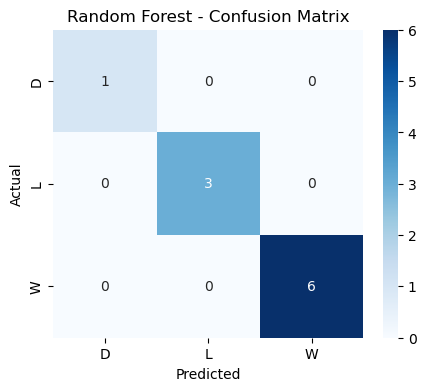

=== Logistic Regression ===
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           D       1.00      1.00      1.00         1
           L       1.00      1.00      1.00         3
           W       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
[[1 0 0]
 [0 3 0]
 [0 0 6]]


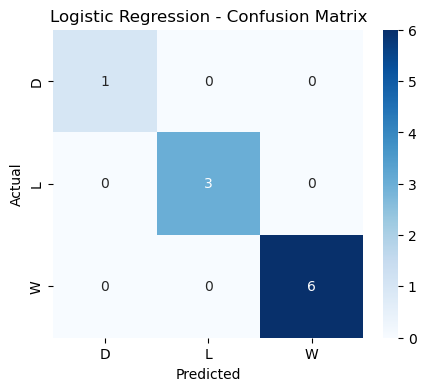

=== KNN ===
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           D       0.00      0.00      0.00         1
           L       0.75      1.00      0.86         3
           W       1.00      1.00      1.00         6

    accuracy                           0.90        10
   macro avg       0.58      0.67      0.62        10
weighted avg       0.82      0.90      0.86        10

Confusion Matrix:
[[0 1 0]
 [0 3 0]
 [0 0 6]]


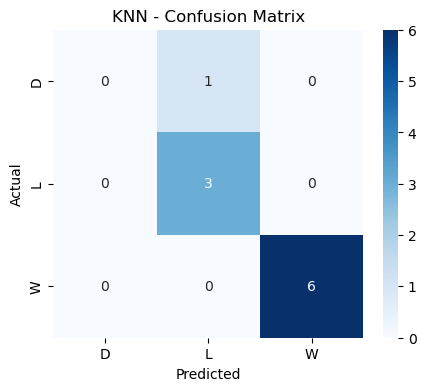

In [170]:
# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"=== {name} ===")
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_, zero_division=0))
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

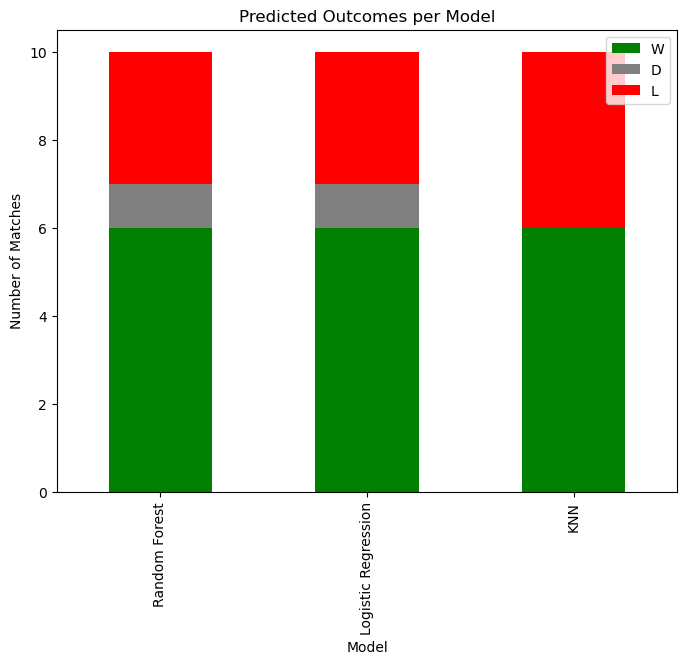

In [177]:
# Store results for combined plots
model_names = []
accuracies = []
cm_counts = {'W': [], 'D': [], 'L': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)
    
    # Count W/D/L predictions for stacked bar
    counts = pd.Series(y_pred).value_counts()
    for label in ['W','D','L']:
        cm_counts[label].append(counts.get(label,0))

df_plot = pd.DataFrame(cm_counts, index=model_names)
df_plot.plot(kind='bar', stacked=True, figsize=(8,6), color=['green','grey','red'])
plt.title('Predicted Outcomes per Model')
plt.ylabel('Number of Matches')
plt.xlabel('Model')
plt.show()

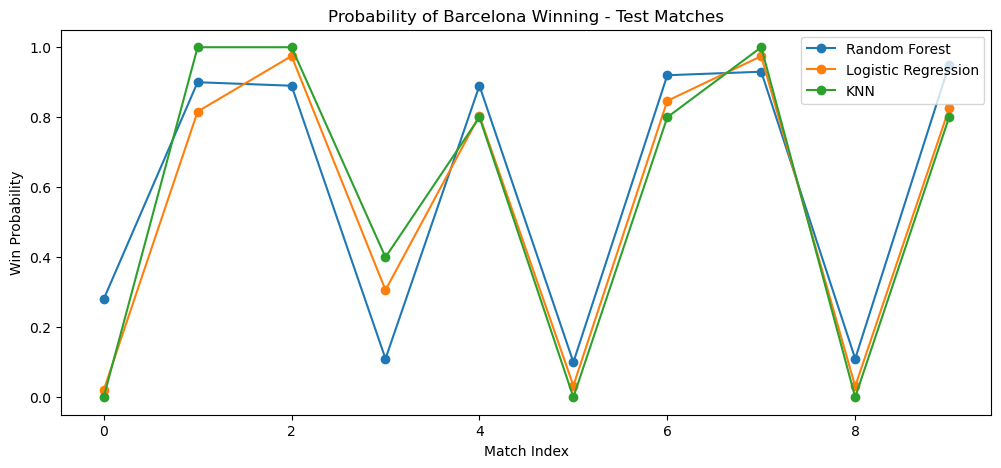

In [178]:
plt.figure(figsize=(12,5))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(X_test)[:, le.classes_ == 'W'].flatten()  # probability of win
        plt.plot(probs, marker='o', label=name)

plt.title("Probability of Barcelona Winning - Test Matches")
plt.xlabel("Match Index")
plt.ylabel("Win Probability")
plt.legend()
plt.show()


In [179]:
# Example: future matches dataframe
future_matches = pd.DataFrame({
    'is_home': [1, 0, 1],               
    'goals_last_5': [2.4, 1.8, 3.0],
    'conceded_last_5': [0.8, 1.2, 1.0],
    'points_last_5': [2.0, 1.4, 2.4],
    'win_streak': [3, -1, 2]
})

# Predict outcomes using all 3 models
for name, model in models.items():
    preds = model.predict(future_matches)
    probs = model.predict_proba(future_matches) if hasattr(model, "predict_proba") else None
    print(f"=== {name} ===")
    print("Predicted Results:", preds)
    if probs is not None:
        print("Win Probabilities:", probs[:, le.classes_ == 'W'].flatten())
    print()

=== Random Forest ===
Predicted Results: ['W' 'L' 'W']
Win Probabilities: [0.94 0.11 0.99]

=== Logistic Regression ===
Predicted Results: ['W' 'D' 'W']
Win Probabilities: [0.99649217 0.03377978 0.97569055]

=== KNN ===
Predicted Results: ['W' 'L' 'W']
Win Probabilities: [1. 0. 1.]



In [199]:
import pandas as pd

match_list = [
    'Barcelona vs Getafe', 'Real Oviedo vs Barcelona', 'Barcelona vs Real Sociedad',
    'Sevilla vs Barcelona', 'Barcelona vs Girona', 'Real Madrid vs Barcelona',
    'Barcelona vs Elche', 'Celta Vigo vs Barcelona', 'Barcelona vs Athletic Club',
    'Barcelona vs Alavés', 'Real Betis vs Barcelona', 'Barcelona vs Osasuna',
    'Villarreal vs Barcelona', 'Espanyol vs Barcelona', 'Barcelona vs Atlético Madrid',
    'Real Sociedad vs Barcelona', 'Barcelona vs Real Oviedo', 'Elche vs Barcelona',
    'Barcelona vs Mallorca', 'Girona vs Barcelona', 'Barcelona vs Levante',
    'Barcelona vs Villarreal', 'Athletic Club vs Barcelona', 'Barcelona vs Sevilla',
    'Barcelona vs Rayo Vallecano', 'Atlético Madrid vs Barcelona', 'Barcelona vs Espanyol',
    'Getafe vs Barcelona', 'Barcelona vs Celta Vigo', 'Osasuna vs Barcelona',
    'Barcelona vs Real Madrid', 'Alavés vs Barcelona', 'Barcelona vs Real Betis',
    'Valencia vs Barcelona', 'Barcelona vs Cádiz', 'Cádiz vs Barcelona',
    'Barcelona vs Granada', 'Granada vs Barcelona'
]

is_home = [
    1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,
    0,1,0,1,0,1,1,0,1,1,0,1,0,1,0,
    1,0,1,0,1,0,1,1
]

laliga_fixtures = pd.DataFrame({
    'match': match_list,
    'is_home': is_home,
    'goals_last_5': [2.5]*len(match_list),
    'conceded_last_5': [1.0]*len(match_list),
    'points_last_5': [2.0]*len(match_list),
    'win_streak': [1]*len(match_list)
})

print(laliga_fixtures)


                           match  is_home  goals_last_5  conceded_last_5  \
0            Barcelona vs Getafe        1           2.5              1.0   
1       Real Oviedo vs Barcelona        0           2.5              1.0   
2     Barcelona vs Real Sociedad        1           2.5              1.0   
3           Sevilla vs Barcelona        0           2.5              1.0   
4            Barcelona vs Girona        1           2.5              1.0   
5       Real Madrid vs Barcelona        0           2.5              1.0   
6             Barcelona vs Elche        1           2.5              1.0   
7        Celta Vigo vs Barcelona        0           2.5              1.0   
8     Barcelona vs Athletic Club        1           2.5              1.0   
9            Barcelona vs Alavés        1           2.5              1.0   
10       Real Betis vs Barcelona        0           2.5              1.0   
11          Barcelona vs Osasuna        1           2.5              1.0   
12       Vil

In [200]:
print(len(match_list))  # should be 38
print(len(is_home)) 

38
38


In [203]:
num_matches = 38
np.random.seed(99)

match_list = laliga_fixtures['match']

barca_attack = np.random.uniform(1.5, 3.0, num_matches)     # expected goals scored
barca_defense = np.random.uniform(0.5, 2.0, num_matches)    # expected goals conceded

opp_attack = np.random.uniform(1.0, 2.5, num_matches)
opp_defense = np.random.uniform(0.5, 2.0, num_matches)

# Home advantage factor
home_adv = laliga_fixtures['is_home'].apply(lambda x: 0.3 if x==1 else -0.2)

# Expected goals using Poisson mean
expected_barca_goals = barca_attack + opp_defense * 0.3 + home_adv
expected_opp_goals = opp_attack + barca_defense * 0.3 - home_adv

# Simulate actual goals with Poisson distribution
sim_barca_goals = np.random.poisson(expected_barca_goals)
sim_opp_goals = np.random.poisson(expected_opp_goals)

# Predictions based on simulated goals
predictions = []
for b, o in zip(sim_barca_goals, sim_opp_goals):
    if b > o:
        predictions.append('Barcelona Win')
    elif b < o:
        predictions.append('Opponent Win')
    else:
        predictions.append('Draw')

# Put everything in DataFrame
laliga_fixtures['sim_barca_goals'] = sim_barca_goals
laliga_fixtures['sim_opp_goals'] = sim_opp_goals
laliga_fixtures['prediction'] = predictions

# Show results
print(laliga_fixtures[['match','sim_barca_goals','sim_opp_goals','prediction']])

                           match  sim_barca_goals  sim_opp_goals  \
0            Barcelona vs Getafe                3              2   
1       Real Oviedo vs Barcelona                4              2   
2     Barcelona vs Real Sociedad                3              1   
3           Sevilla vs Barcelona                2              0   
4            Barcelona vs Girona                0              5   
5       Real Madrid vs Barcelona                2              3   
6             Barcelona vs Elche                2              0   
7        Celta Vigo vs Barcelona                4              0   
8     Barcelona vs Athletic Club                1              3   
9            Barcelona vs Alavés                6              0   
10       Real Betis vs Barcelona                1              1   
11          Barcelona vs Osasuna                8              3   
12       Villarreal vs Barcelona                2              5   
13         Espanyol vs Barcelona                

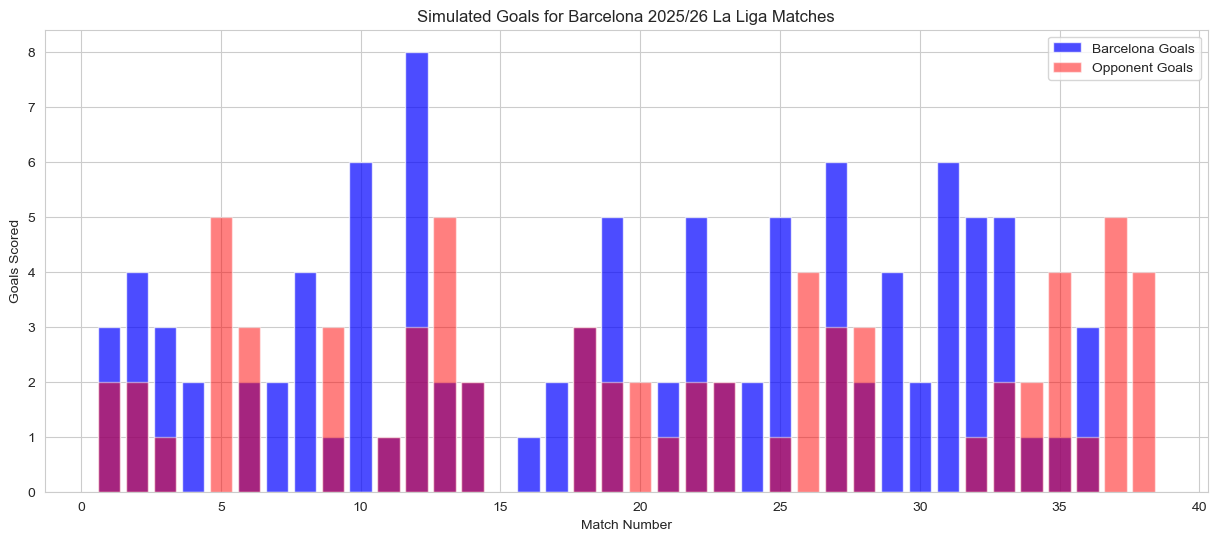

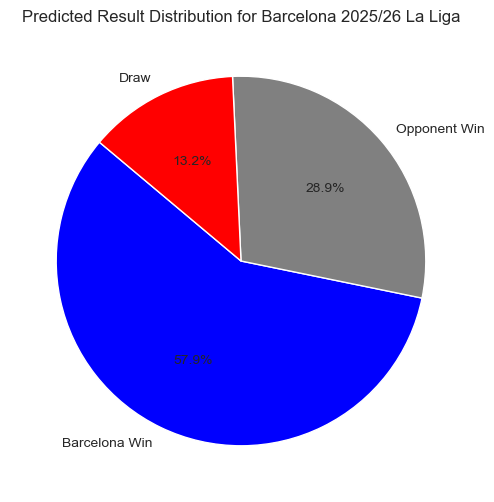

In [204]:
sns.set_style("whitegrid")

# Bar chart: Barcelona goals vs Opponent goals
plt.figure(figsize=(15,6))
x = range(1, num_matches+1)
plt.bar(x, laliga_fixtures['sim_barca_goals'], color='blue', alpha=0.7, label='Barcelona Goals')
plt.bar(x, laliga_fixtures['sim_opp_goals'], color='red', alpha=0.5, label='Opponent Goals')
plt.xlabel('Match Number')
plt.ylabel('Goals Scored')
plt.title('Simulated Goals for Barcelona 2025/26 La Liga Matches')
plt.legend()
plt.show()

# Pie chart: Result distribution
result_counts = laliga_fixtures['prediction'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%', colors=['blue','gray','red'], startangle=140)
plt.title('Predicted Result Distribution for Barcelona 2025/26 La Liga')
plt.show()

In [207]:
print("Visca Barca!!")

Visca Barca!!
